In [1]:
%matplotlib inline

/Users/haonansun/Documents/Break12306Captcha/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
from PIL import Image

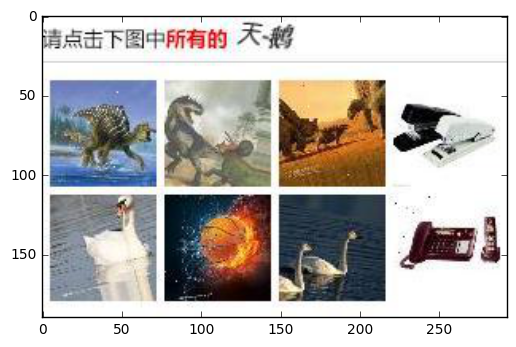

In [4]:
img = Image.open('../data/captcha_0.jpg')
plt.imshow(img)

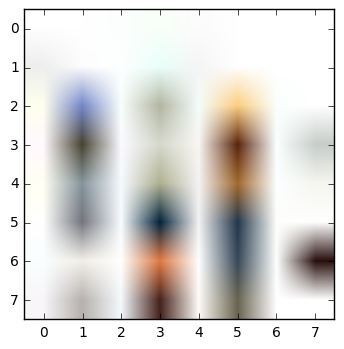

In [5]:
shrinked_size = 8
img = img.resize((shrinked_size, shrinked_size))
plt.imshow(img)

In [6]:
img_arr = np.asanyarray(img)
print 'Image array shape: {}'.format(img_arr.shape)

r_channel, g_channel, b_channel = img_arr[:, :, 0], img_arr[:, :, 1], img_arr[:, :, 2]
r_mean, g_mean, b_mean = r_channel.mean(), g_channel.mean(), b_channel.mean()
r_filtered, g_filtered, b_filtered = 1 * (r_channel > r_mean), 1 * (g_channel > g_mean), 1 * (b_channel > b_mean)
r_flatten, g_flatten, b_flatten = map(lambda filt: filt.flatten(), [r_filtered, g_filtered, b_filtered])

Image array shape: (8, 8, 3)


In [7]:
phash = np.concatenate((r_flatten, g_flatten, b_flatten))